https://www.kaggle.com/competitions/store-sales-time-series-forecasting

https://www.kaggle.com/code/kashishrastogi/store-sales-analysis-time-serie

https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

https://www.kaggle.com/code/odins0n/exploring-time-series-plots-beginners-guide

https://www.kaggle.com/code/maricinnamon/store-sales-time-series-forecast-visualization

https://www.kaggle.com/code/kartushovdanil/econometrics-is-all-you-need

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%time
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

holidays_events = pd.read_csv('holidays_events.csv')
oil_df = pd.read_csv('oil.csv')
stores_df = pd.read_csv('stores.csv')
# transactions_df = pd.read_csv('transactions.csv')

CPU times: total: 1.23 s
Wall time: 1.31 s


In [3]:
train_df_o = train_df.copy()

In [4]:
train_df = train_df_o.copy()

In [5]:
train_df = train_df.merge(stores_df,
                          on='store_nbr',
                          how='left',
                          validate='m:1').rename(columns={'type': 'store_type'})

train_df = train_df.merge(holidays_events.drop_duplicates(subset=['date', 'locale_name']),
                          left_on=['date', 'city'],
                          right_on=['date', 'locale_name'],
                          how='left', validate='m:1').rename(columns={'type': 'holiday_type'})

train_df = train_df.merge(oil_df, on='date', how='left', validate='m:1')

In [6]:
train_df = train_df.drop(['locale', 'locale_name', 'description', 'transferred'], axis=1)
train_df['date'] = pd.to_datetime(train_df['date'])

In [7]:
train_df['dcoilwtico'] = train_df['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')
train_df['holiday_type'] = np.where(train_df['holiday_type'].isin(['Holiday', 'Additional']), 1, 0)

In [8]:
train_df.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
holiday_type    0
dcoilwtico      0
dtype: int64

In [9]:
round(train_df.select_dtypes(include=['int64', 'float64']).describe().T)

,count,mean,std,min,25%,50%,75%,max
id,3000888.0,1500444.0,866282.0,0.0,750222.0,1500444.0,2250665.0,3000887.0
store_nbr,3000888.0,28.0,16.0,1.0,14.0,28.0,41.0,54.0
sales,3000888.0,358.0,1102.0,0.0,0.0,11.0,196.0,124717.0
onpromotion,3000888.0,3.0,12.0,0.0,0.0,0.0,0.0,741.0
cluster,3000888.0,8.0,5.0,1.0,4.0,8.0,13.0,17.0
dcoilwtico,3000888.0,68.0,26.0,26.0,46.0,53.0,96.0,111.0


In [10]:
train_df.select_dtypes(include=['object']).nunique()

family        33
city          22
state         16
store_type     5
dtype: int64

In [15]:
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['year_month'] = (train_df['year'].astype('str') + list(map(lambda x: "{:02d}".format(x), train_df['month']))).astype('str')
train_df['week'] = train_df['date'].dt.isocalendar().week.astype('int64')
train_df['quarter'] = train_df['date'].dt.quarter
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['day_of_month'] = train_df['date'].dt.day

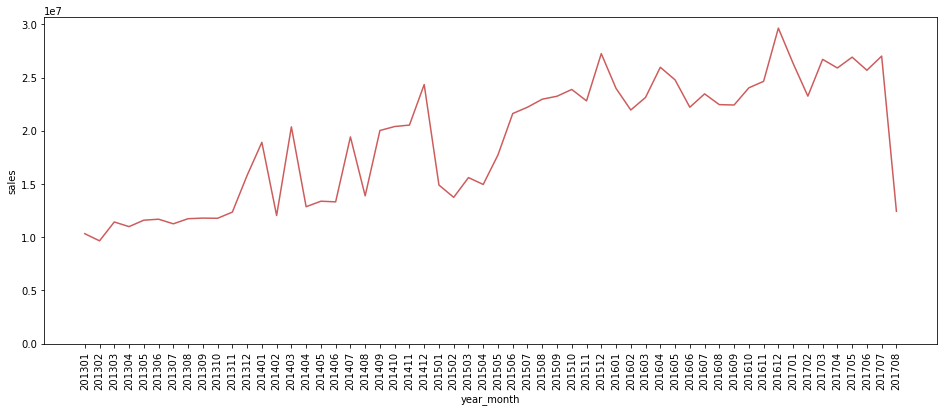

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=train_df.groupby(['year_month'], as_index=False)['sales'].sum(),
             x='year_month',
             y='sales',
             color='indianred')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

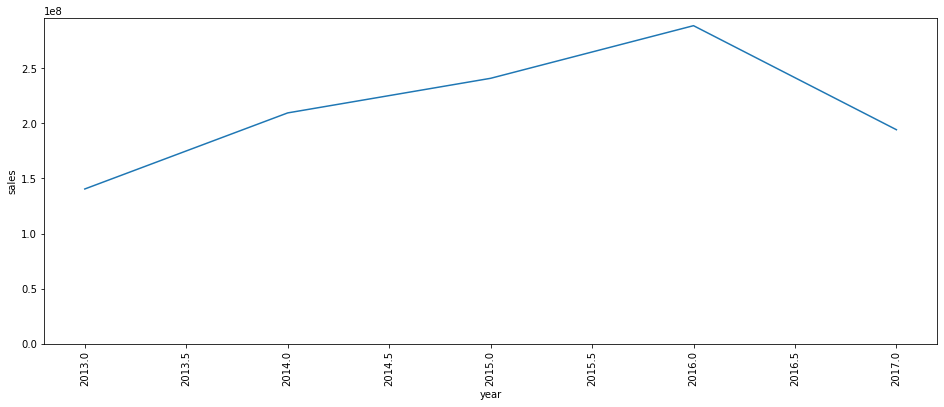

In [17]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=train_df.groupby(['year'], as_index=False)['sales'].sum(),
             x='year',
             y='sales')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

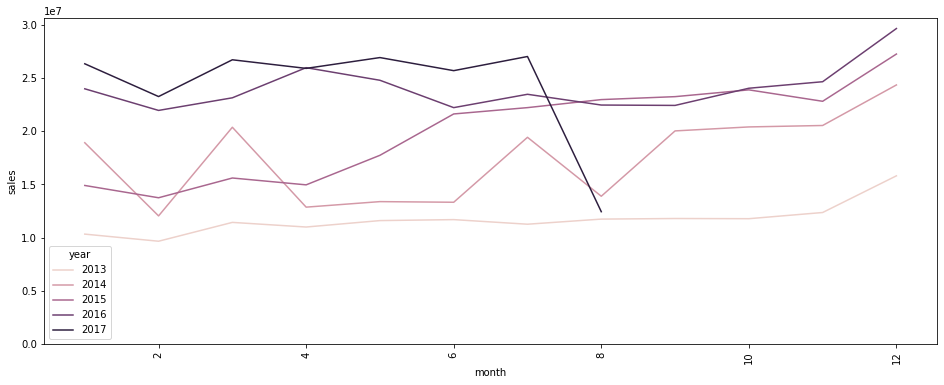

In [18]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=train_df.groupby(['year', 'month'], as_index=False)['sales'].sum(),
             x='month',
             y='sales',
             hue='year')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

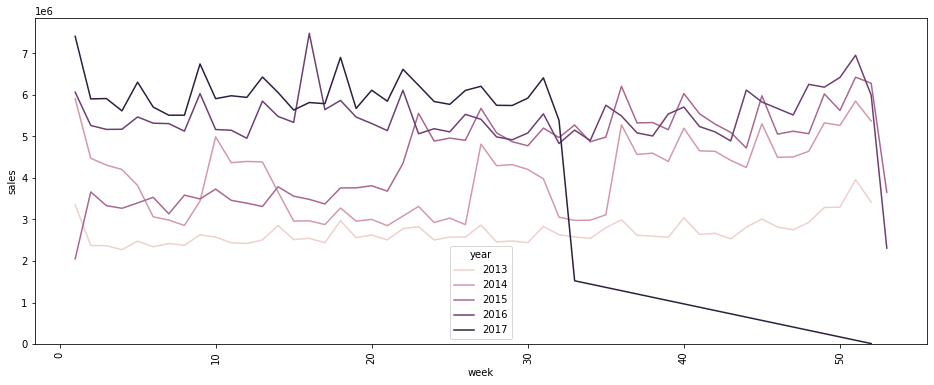

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=train_df.groupby(['year', 'week'], as_index=False)['sales'].sum(),
             x='week',
             y='sales',
             hue='year')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

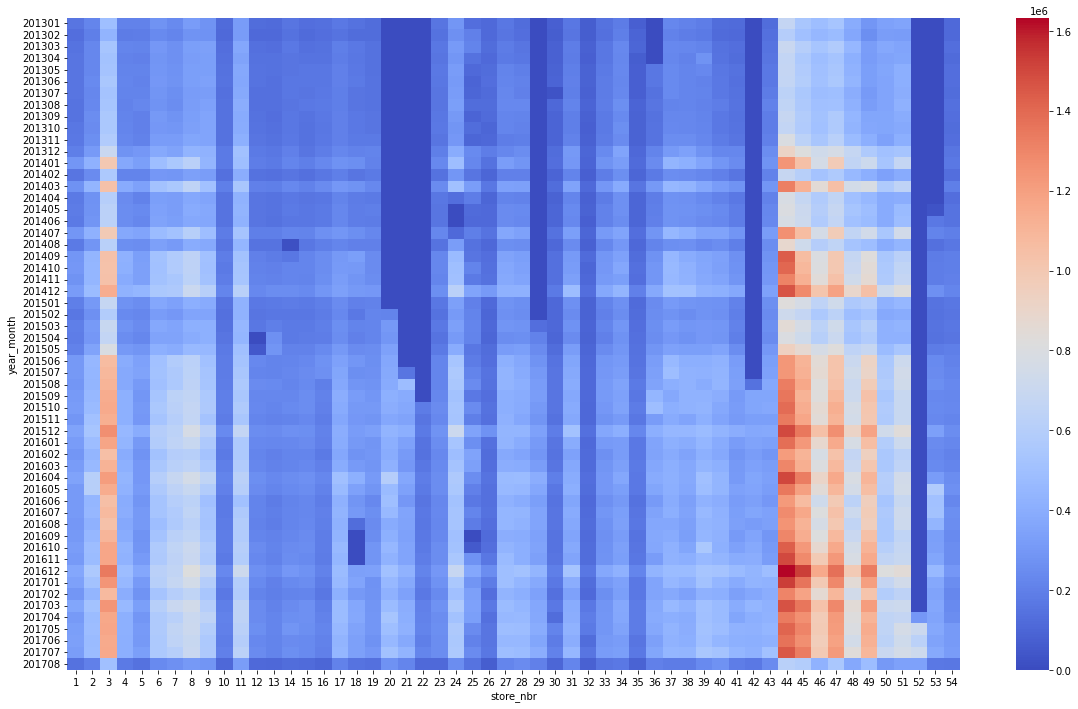

In [20]:
# store
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.pivot_table(index='year_month', columns='store_nbr', values='sales', aggfunc='sum'),
            vmin=0,
            annot=False,
            cbar=True,
            square=False,
            cmap='coolwarm')
plt.show()

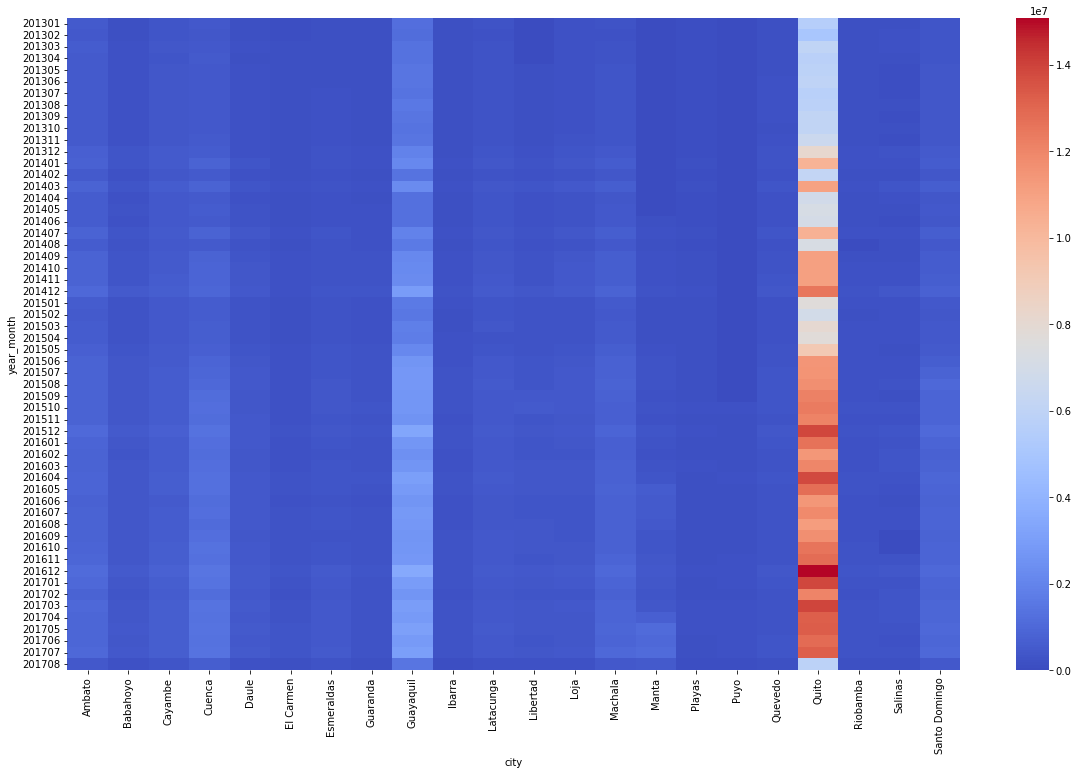

In [21]:
# city
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.pivot_table(index='year_month', columns='city', values='sales', aggfunc='sum'),
            vmin=0,
            annot=False,
            cbar=True,
            square=False,
            cmap='coolwarm')
plt.show()

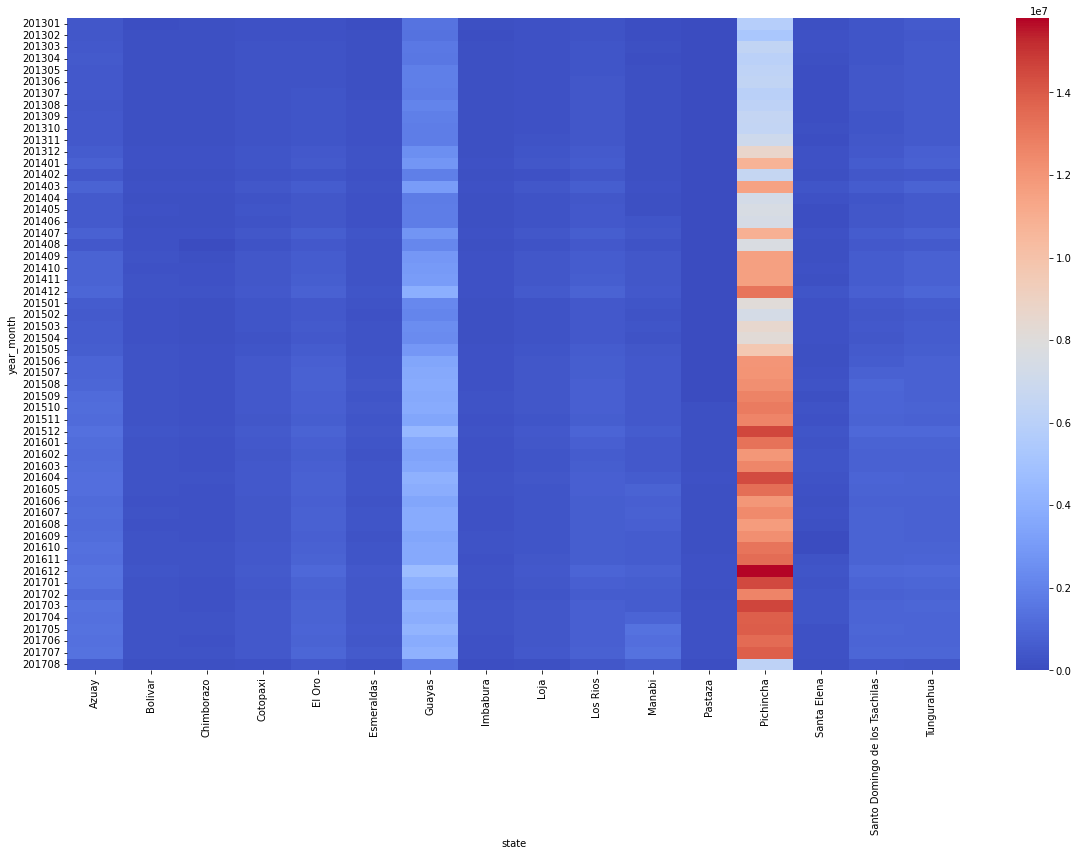

In [22]:
# state
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.pivot_table(index='year_month', columns='state', values='sales', aggfunc='sum'),
            vmin=0,
            annot=False,
            cbar=True,
            square=False,
            cmap='coolwarm')
plt.show()

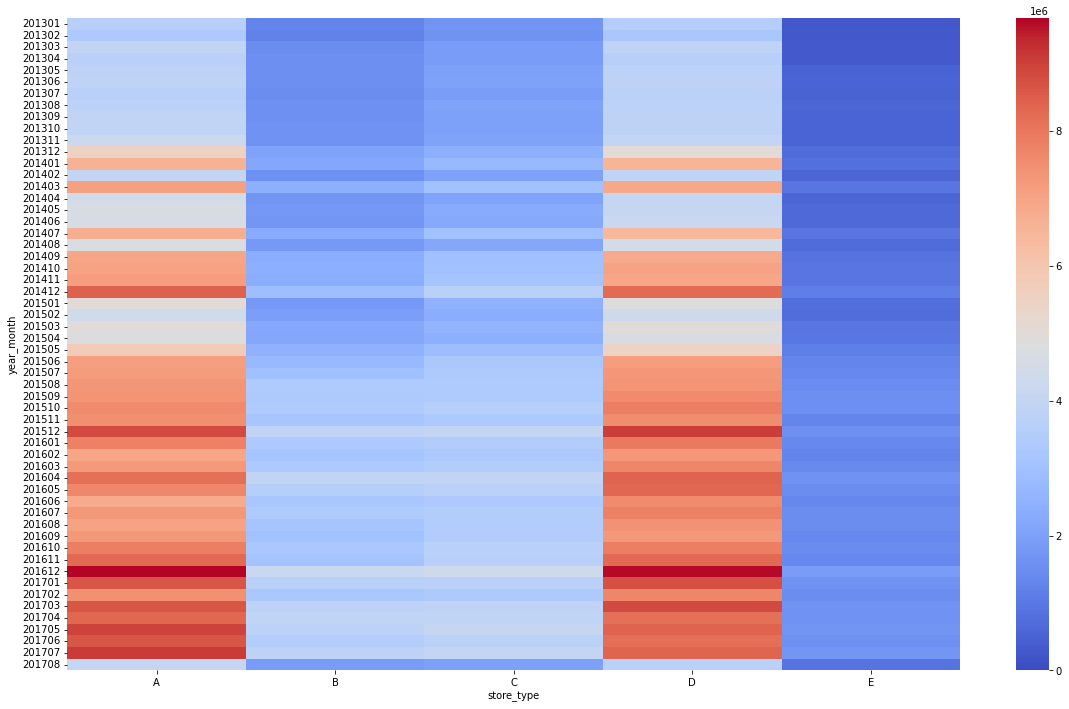

In [23]:
# store_type
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.pivot_table(index='year_month', columns='store_type', values='sales', aggfunc='sum'),
            vmin=0,
            annot=False,
            cbar=True,
            square=False,
            cmap='coolwarm')
plt.show()

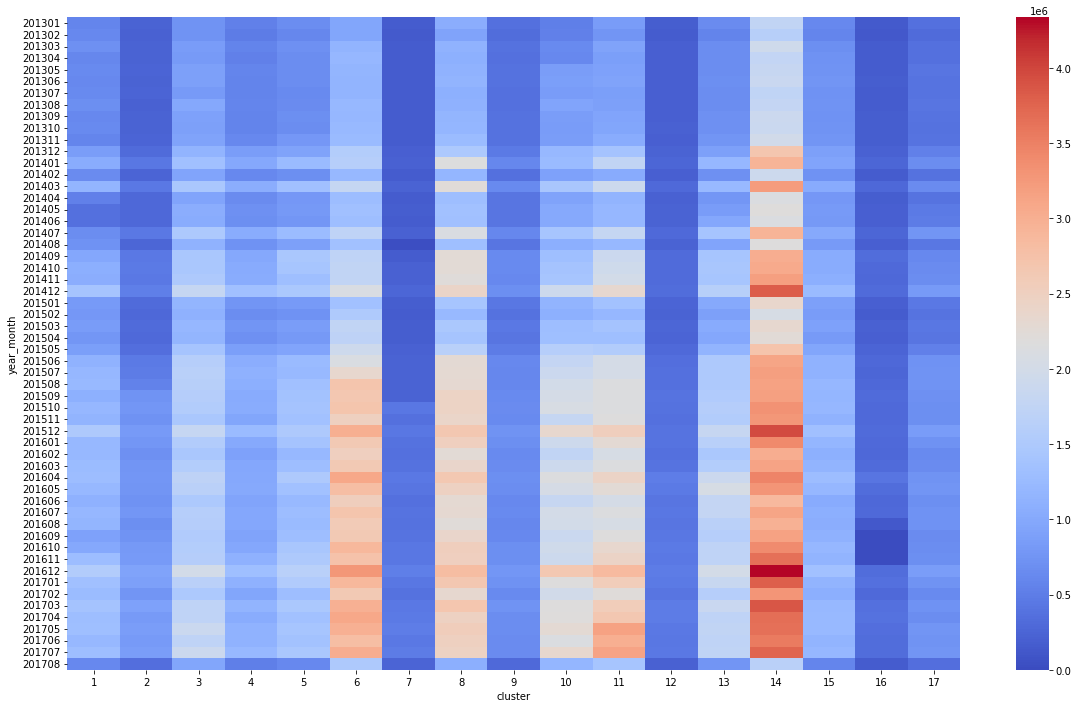

In [24]:
# cluster
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.pivot_table(index='year_month', columns='cluster', values='sales', aggfunc='sum'),
            vmin=0,
            annot=False,
            cbar=True,
            square=False,
            cmap='coolwarm')
plt.show()

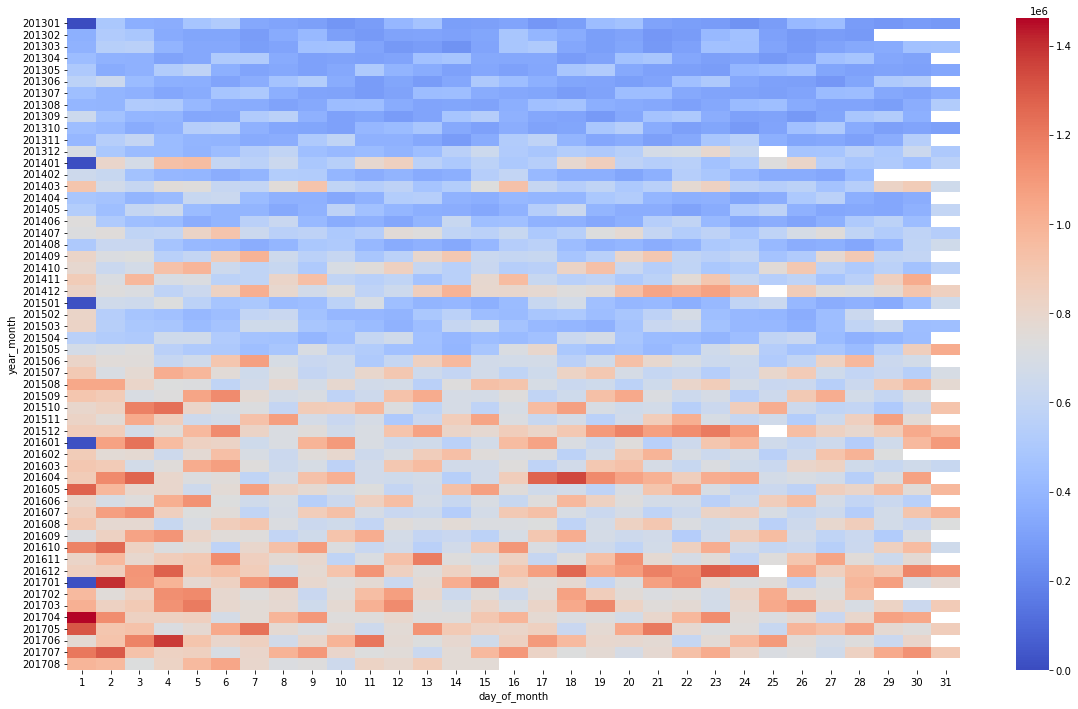

In [25]:
# cluster
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.pivot_table(index='year_month', columns='day_of_month', values='sales', aggfunc='sum'),
            vmin=0,
            annot=False,
            cbar=True,
            square=False,
            cmap='coolwarm')
plt.show()

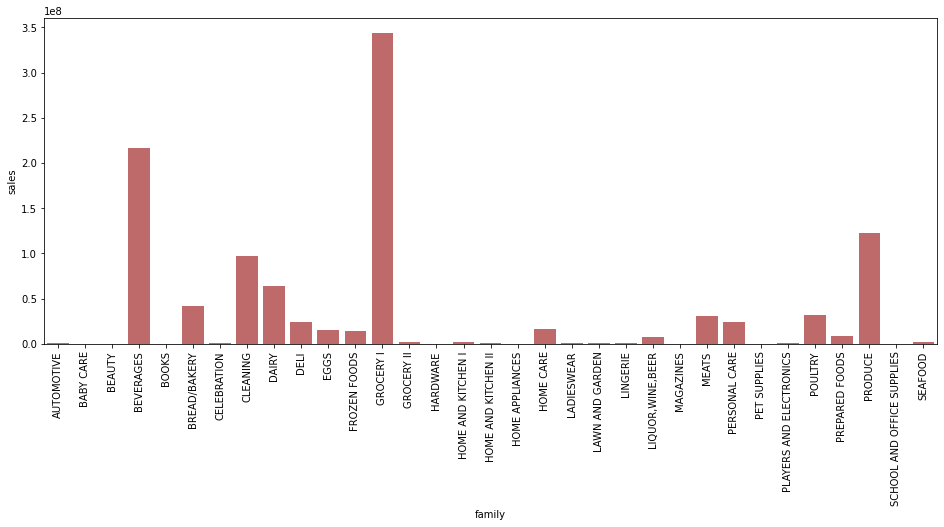

In [26]:
plt.figure(figsize=(16, 6))
sns.barplot(data=train_df.groupby(['family'], as_index=False)['sales'].sum(), x='family', y='sales', color='indianred')
plt.xticks(rotation=90)
plt.show()

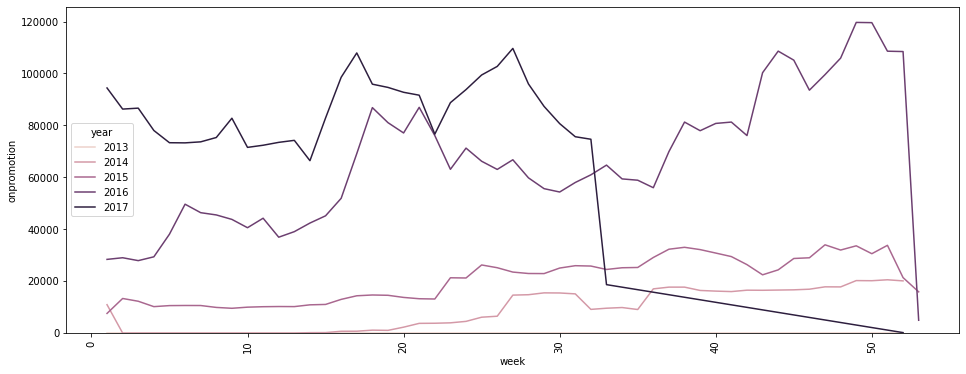

In [27]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=train_df.groupby(['year', 'week'], as_index=False)['onpromotion'].sum(),
             x='week',
             y='onpromotion',
             hue='year')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

C:\Users\Fury\AppData\Local\Temp\ipykernel_18816\29898515.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sns.scatterplot(data=train_df.groupby(['family', 'store_nbr'], as_index=False)['sales', 'onpromotion'].sum(),


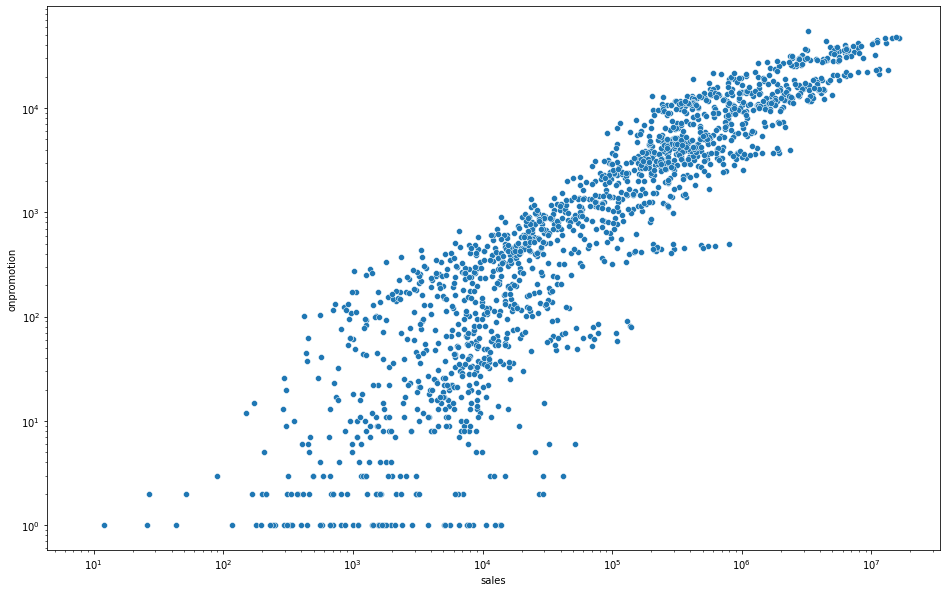

In [28]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=train_df.groupby(['family', 'store_nbr'], as_index=False)['sales', 'onpromotion'].sum(),
                x='sales',
                y='onpromotion')
plt.yscale('log')
plt.xscale('log')
plt.show()